In [1]:
from ptl_si import PTL_SI, utils, gen_data
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm


# TransFusion

In [4]:
def run_TF(max_iter=1000):
    p = 300
    s = 0
    true_beta = 0.5
    gamma = 0.01
    nS = 100
    nT = 50
    num_info_aux = 3
    num_uninfo_aux = 2
    K = num_info_aux + num_uninfo_aux
    N = nS * K + nT
    ak_weights = utils.compute_adaptive_weights(K, nS, nT)
    lambda_0 = np.sqrt(np.log(p)/N)
    lambda_tilde = np.sqrt(np.log(p)/nT)
    
    p_sel_list = []
    total_false_positives_detected = 0
    total_false_positives_rejected = 0

    alpha = 0.05

    for i in range(max_iter):
        XS_list, YS_list, X0, Y0, true_Y, SigmaS_list, Sigma0, beta_0 = gen_data.generate_data(p, s, nS, nT, true_beta, num_info_aux, num_uninfo_aux, gamma)
        p_sel = PTL_SI.PTL_SI_TF_randj(X0, Y0, XS_list, YS_list, lambda_0, lambda_tilde, ak_weights, SigmaS_list, Sigma0, z_min=-20, z_max=20)
        if p_sel is not None:
            total_false_positives_detected += 1
            if p_sel <= alpha:
                total_false_positives_rejected += 1
            
            p_sel_list.append(p_sel)

    if total_false_positives_detected > 0:
        FPR = total_false_positives_rejected / total_false_positives_detected
    else:
        FPR = 0

    print (f'FPR = {FPR}')
    stat, p_val = stats.kstest(p_sel_list, 'uniform')
    print(f"KS-Test p-value: {p_val}")
    
    plt.rcParams.update({'font.size': 18})
    grid = np.linspace(0, 1, 101)
    plt.plot(grid, sm.distributions.ECDF(np.array(p_sel_list))(grid), 'r-', linewidth=6, label='p_value')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.legend()
    plt.tight_layout()
    plt.show()
            

In [ ]:
run_TF()

# Oracle TransLasso

In [2]:
def run_OTL(max_iter=1000):
    p = 300
    s = 0
    true_beta = 0.5
    gamma = 0.01
    nS = 100
    nT = 50
    num_info_aux = 5
    num_uninfo_aux = 0
    K = num_info_aux + num_uninfo_aux
    nI = nS * K 

    
    lambda_w = np.sqrt(np.log(p)/nI) 
    lambda_del = np.sqrt(np.log(p)/nT) 
    
    p_sel_list = []
    total_false_positives_detected = 0
    total_false_positives_rejected = 0

    alpha = 0.05

    for i in range(max_iter):
        XI_list, YI_list, X0, Y0, true_Y, SigmaI_list, Sigma0, beta_0 = gen_data.generate_data(p, s, nS, nT, true_beta, num_info_aux, num_uninfo_aux, gamma)
        p_sel = PTL_SI.PTL_SI_OTL_randj(X0, Y0, XI_list, YI_list, lambda_w, lambda_del, SigmaI_list, Sigma0, z_min=-20, z_max=20)
        if p_sel is not None:
            total_false_positives_detected += 1
            if p_sel <= alpha:
                total_false_positives_rejected += 1
            
            p_sel_list.append(p_sel)

    if total_false_positives_detected > 0:
        FPR = total_false_positives_rejected / total_false_positives_detected
    else:
        FPR = 0

    print (f'FPR = {FPR}')
    stat, p_val = stats.kstest(p_sel_list, 'uniform')
    print(f"KS-Test p-value: {p_val}")
    
    plt.rcParams.update({'font.size': 18})
    grid = np.linspace(0, 1, 101)
    plt.plot(grid, sm.distributions.ECDF(np.array(p_sel_list))(grid), 'r-', linewidth=6, label='p_value')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.legend()
    plt.tight_layout()
    plt.show()
            

FPR = 0.051
KS-Test p-value: 0.4282395109676099


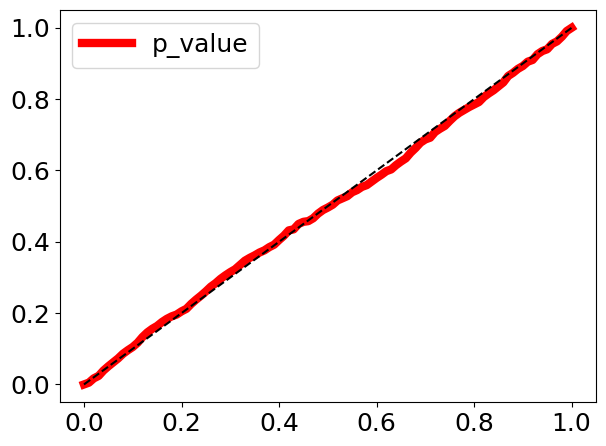

In [3]:
run_OTL()